# Filtering

In [1]:
import numpy as np
from scipy.signal import correlate2d, convolve2d
from skimage.io import imread, imshow
from skimage.filters import gaussian
from skimage.transform import resize
from skimage import img_as_float, img_as_ubyte
import matplotlib.pyplot as plt

## Improving of the image sharpness
The first way is to use lost detailes.

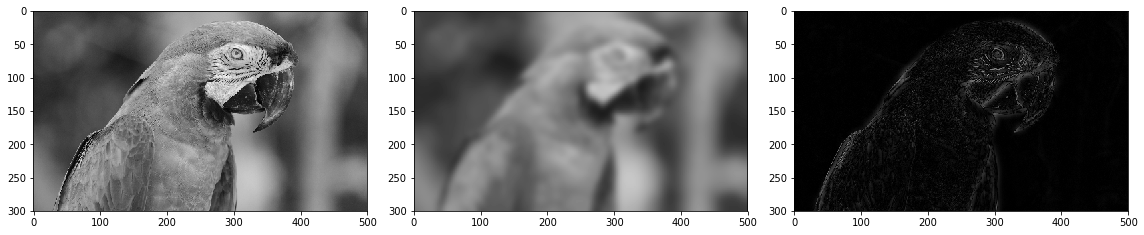

In [25]:
img = resize(imread('parrot.png', as_gray=True), (300, 500))
plt.figure(figsize=(16,6))
plt.subplot(131)
imshow(img)
plt.subplot(132)
img_blur = gaussian(img, sigma=5)
imshow(img_blur)
plt.subplot(133)
imshow(abs(img - img_blur))

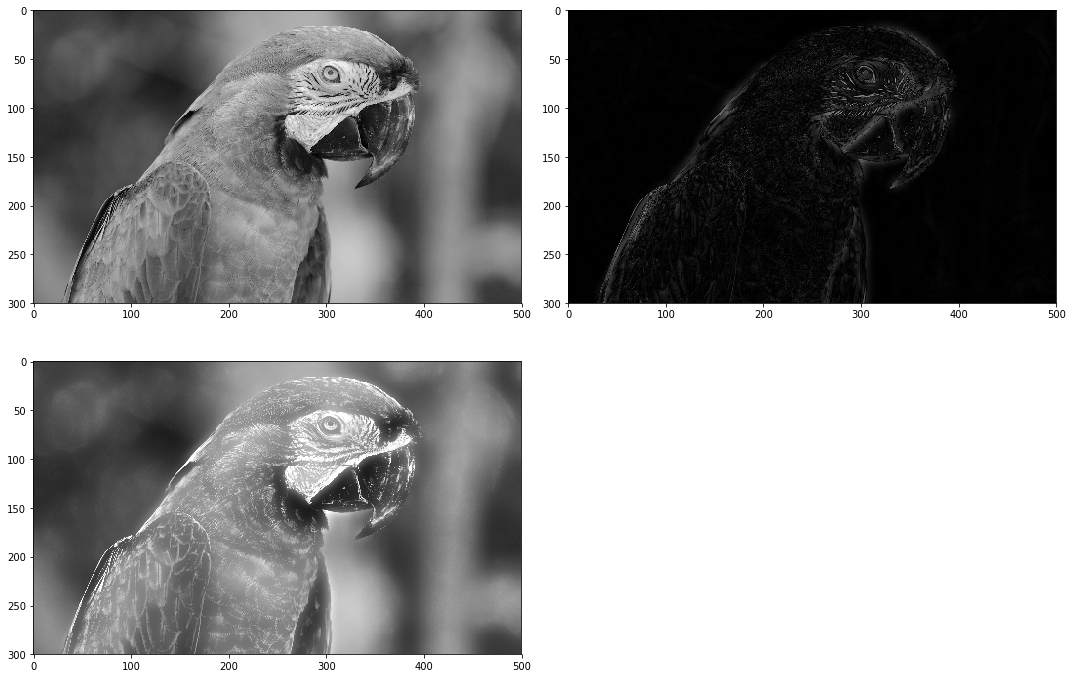

In [28]:
plt.figure(figsize=(15, 10))
plt.subplot(221)
imshow(img)
plt.subplot(222)
img_details = abs(img - img_blur)
imshow(img_details)
plt.subplot(223)
alpha = 1
img_sharp = np.clip(img + alpha * img_details, 0, 1)
imshow(img_sharp)

The second way is to use kernel.

In [4]:
kernel = 1 / 10 * np.array([[-1, -2, -1], 
                           [-2, 22, -2],
                           [-1, -2, -1]
                          ])
np.sum(kernel)

0.9999999999999999

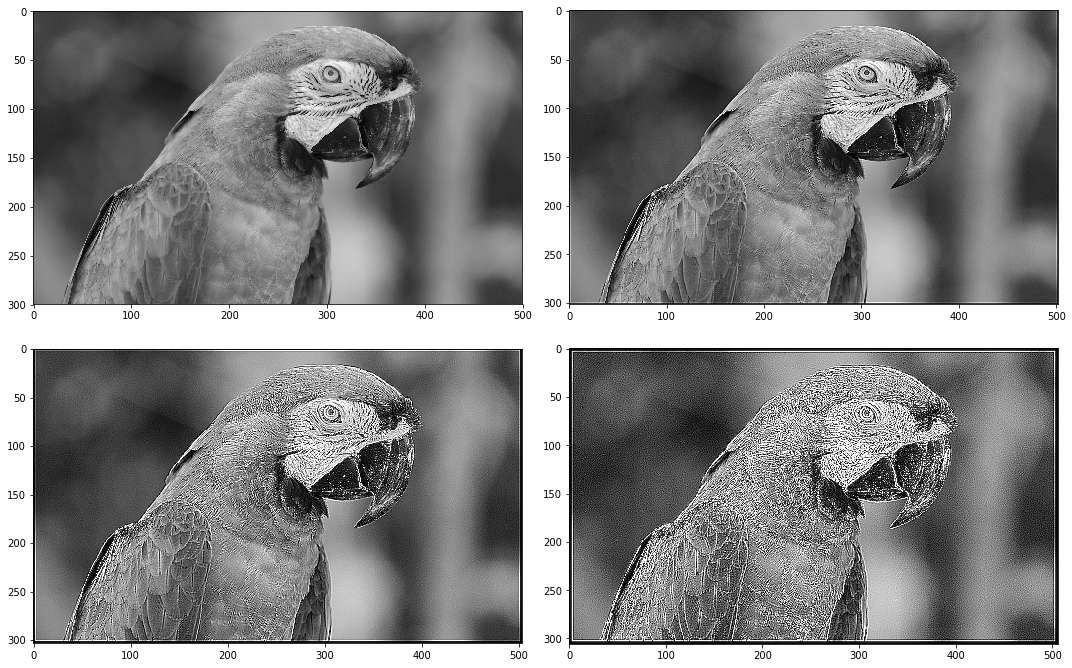

In [5]:
plt.figure(figsize=(15, 10))
plt.subplot(221)
imshow(img)
plt.subplot(222)
img_sharp_1 = np.clip(abs(correlate2d(img, kernel)),0,1)
imshow(img_sharp_1)
plt.subplot(223)
img_sharp_2 = np.clip(abs(correlate2d(img_sharp_1, kernel)),0,1)
imshow(img_sharp_2)
plt.subplot(224)
img_sharp_3 = np.clip(abs(correlate2d(img_sharp_2, kernel)),0,1)
imshow(img_sharp_3)

## Median filter

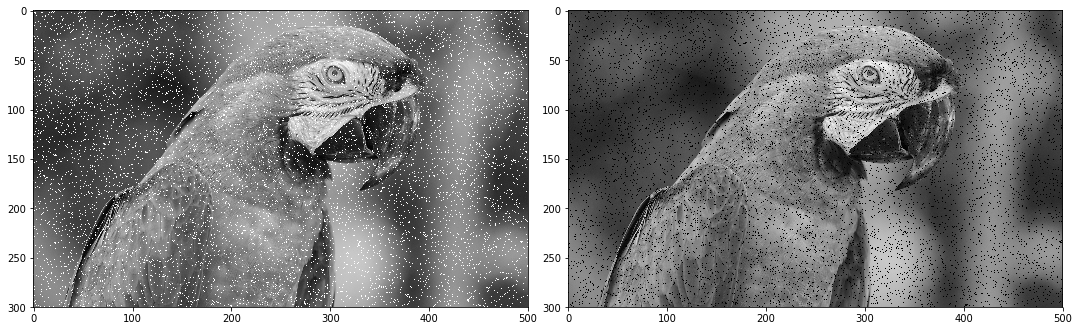

In [6]:
from skimage.util import random_noise
img_noisy = random_noise(img, 'salt')
img_noisy = random_noise(img_noisy, 'pepper')
plt.figure(figsize=(15, 5))
plt.subplot(121)
imshow(random_noise(img, 'salt'))
plt.subplot(122)
imshow(random_noise(img, 'pepper'))

/home/user/.virtualenvs/dnn/lib/python3.6/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


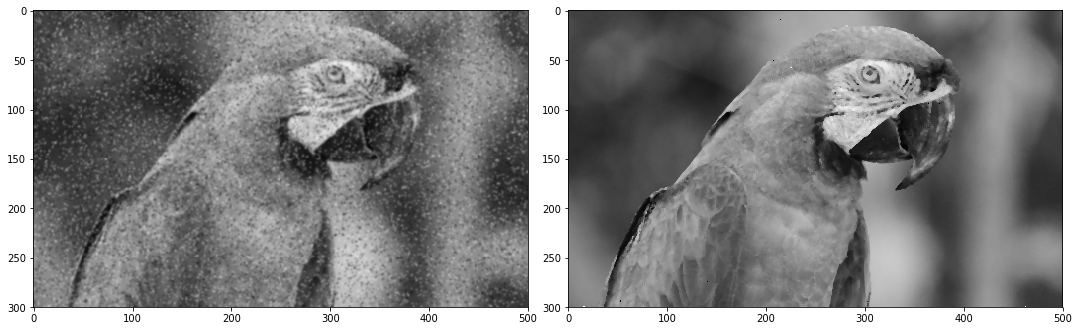

In [29]:
from skimage.filters import gaussian, median
plt.figure(figsize=(15, 5))
plt.subplot(121)
imshow(gaussian(img_noisy, sigma=1))
plt.subplot(122)
imshow(median(img_noisy))

# Image segmentation

In [8]:
from skimage.io import imread, imsave, imshow
from skimage.exposure import equalize_hist, rescale_intensity
from skimage.filters import try_all_threshold, inverse
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/home/user/.virtualenvs/dnn/lib/python3.6/site-packages/skimage/io/_io.py:49: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')


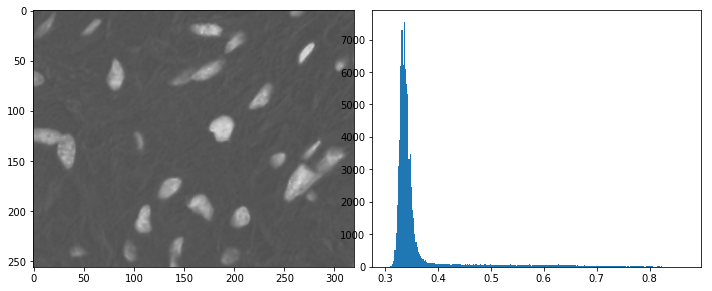

In [9]:
img = 1 - imread('nuclea.png', as_grey=True)
plt.figure(figsize=(10,4))
plt.subplot(121)
imshow(img)
plt.subplot(122)
plt.hist(img.ravel(), bins = 256);

## Supervised segmentation

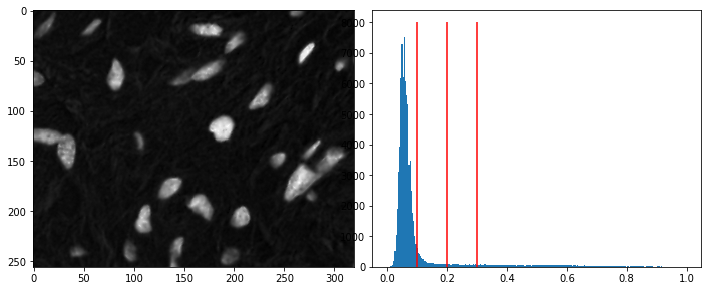

In [10]:
img_new = rescale_intensity(img)
plt.figure(figsize=(10,4))
plt.subplot(121)
imshow(img_new)
plt.subplot(122)
plt.hist(img_new.ravel(), bins = 256);
plt.vlines(0.1, 0, 8000, colors = 'r')
plt.vlines(0.2, 0, 8000, colors = 'r')
plt.vlines(0.3, 0, 8000, colors = 'r')

In [30]:
print(img.min(), img.max())

0.007132764705882669 0.9705809803921654


In [32]:
img_bw = img > 0.1
print(img_bw.min(), img_bw.max())

False True


Text(0.5, 1.0, 'threshlod = 0.3')

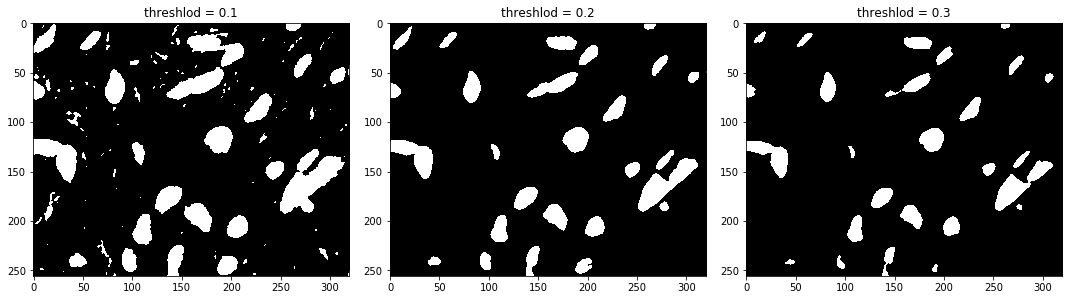

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(131)
imshow(img_new > 0.1)
plt.title('threshlod = 0.1')
plt.subplot(132)
imshow(img_new > 0.2)
plt.title('threshlod = 0.2')
plt.subplot(133)
imshow(img_new > 0.3)
plt.title('threshlod = 0.3')

## Morphology

In [17]:
from skimage.morphology import binary_erosion, binary_dilation, binary_opening, binary_closing, rectangle, diamond, disk

In [33]:
kernel_disk = disk(radius = 3)
kernel_disk

array([[0, 0, 0, 1, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 1, 0, 0, 0]], dtype=uint8)

In [35]:
kernel_rect = rectangle(4, 2)
kernel_rect

array([[1, 1],
       [1, 1],
       [1, 1],
       [1, 1]], dtype=uint8)

In [36]:
kernel_diam = diamond(3)
kernel_diam

array([[0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0]], dtype=uint8)

In [54]:

plt.figure(figsize=(10,5))
plt.subplot(121)
imshow(img_new > 0.1)
plt.title('threshlod = 0.2')
plt.subplot(122)
imshow(binary_erosion(img_new > 0.1, selem = kernel_disk))
plt.title('threshlod = 0.2, erosion')


ImportError: cannot import name 'inverse'

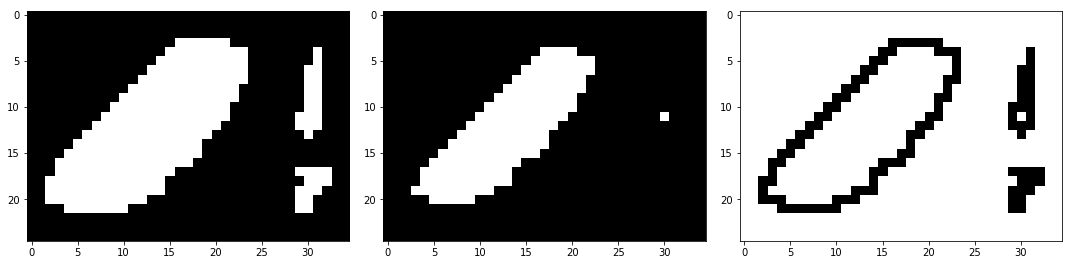

In [66]:

part = img_new[5:30, 45:80] > 0.1
kernel = np.ones((3,3))
plt.figure(figsize=(15,10))
plt.subplot(131)
imshow(part)
plt.subplot(132)
part[10,29] = 1
imshow(binary_erosion(part , selem = kernel))
plt.subplot(133)
imshow((1 - part).astype(bool) + binary_erosion(part , selem = kernel))

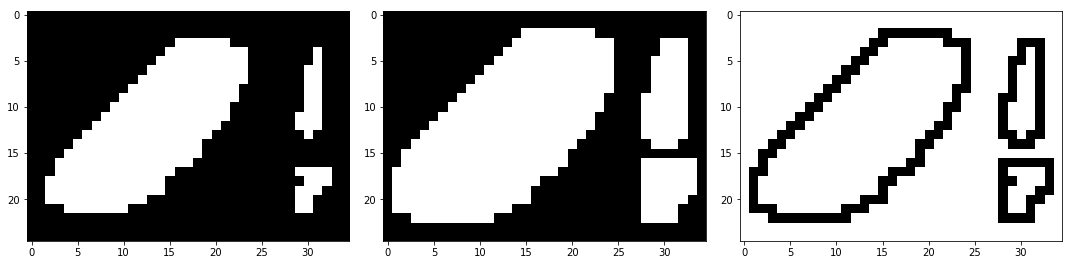

In [71]:
part = img_new[5:30, 45:80] > 0.1
kernel = np.ones((3,3))
plt.figure(figsize=(15,10))
plt.subplot(131)
imshow(part)
plt.subplot(132)
part[10,29] = 1
imshow(binary_dilation(part , selem = kernel))
plt.subplot(133)
imshow((1 - binary_dilation(part , selem = kernel)).astype(bool) + part)

In [73]:
from skimage.measure import label, regionprops

In [81]:
label_img = label(img_new > 0.3)
regions = regionprops(label_img)

/home/user/.virtualenvs/dnn/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


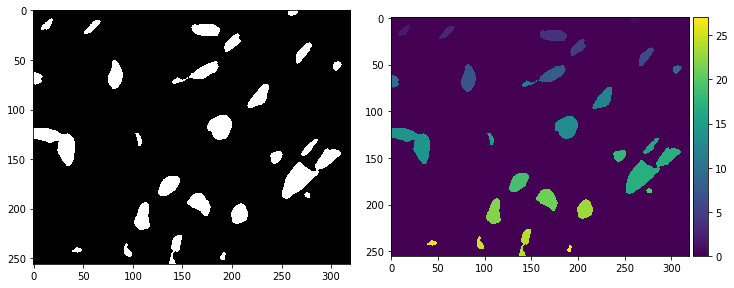

In [75]:
plt.figure(figsize=(15,10))
plt.subplot(131)
imshow(img_new > 0.3)
plt.subplot(132)
imshow(label_img)

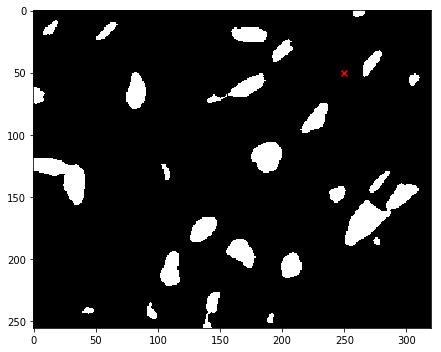

In [96]:
coord = (50, 250)
plt.figure(figsize=(10,5))
imshow(img_new > 0.3)
plt.scatter(coord[1], coord[0], c='r', marker='x')

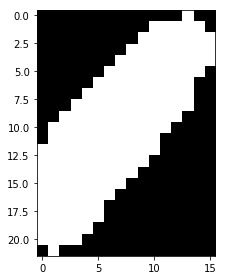

In [98]:
from scipy.spatial.distance import euclidean
dist = []
for region in regions:
    centr = region.centroid
    dist.append(euclidean(coord, centr))
imshow(regions[np.argmin(dist)].image)

In [85]:
area = []
for region in regions:
    area.append(region.area)
print(area)

[49, 75, 105, 292, 171, 168, 342, 309, 60, 102, 52, 284, 459, 760, 52, 112, 994, 125, 309, 26, 348, 319, 267, 181, 67, 36, 33]


In [86]:
np.argmax(area)

16

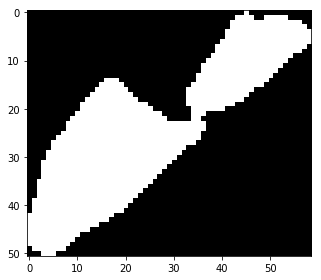

In [90]:
imshow(regions[np.argmax(area)].image)

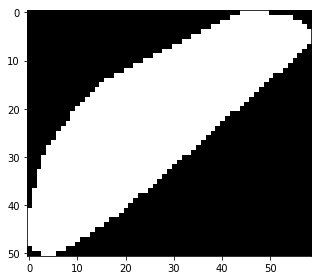

In [89]:
imshow(regions[np.argmax(area)].convex_image)

## Unsupervised segmentation
Adaptive methods for choosing the threshold
- Otsu
- Li
- Local

In Otsu's method we exhaustively search for the threshold that minimizes the intra-class variance (the variance within the class), defined as a weighted sum of variances of the two classes:

\begin{aligned} 
\sigma_{w}^{2}(t) = \omega_{0}(t) \sigma_{0}^{2}(t)+ \omega_{1}(t) \sigma_{1}^{2}(t)
\end{aligned} 

Weights $\omega _{0}$ and $\omega _{1}$ are the probabilities of the two classes separated by a threshold $t$ ,and $\sigma _{0}^{2}$ and $\sigma _{1}^{2}$ are variances of these two classes.

The class probability $\omega_{0,1}(t)$ is computed from the $L$ bins of the histogram:

\begin{aligned}
\omega_{0}(t)&=\sum_{i=0}^{t-1}p(i)\\
\omega_{1}(t)&=\sum_{i=t}^{L-1}p(i)
\end{aligned}

Otsu shows that minimizing the intra-class variance is the same as maximizing inter-class variance:

\begin{aligned}
\sigma_{b}^{2}(t)&=\sigma ^{2}-\sigma_{w}^{2}(t)=\omega_{0}(\mu_{0}-\mu_{T})^{2}+\omega_{1}(\mu_{1}-\mu_{T})^{2}\\
&=\omega_{0}(t)\omega_{1}(t)\left[\mu_{0}(t)-\mu_{1}(t)\right]^{2}
\end{aligned}

which is expressed in terms of class probabilities $\omega$  and class means $\mu$.

while the class mean $\mu_{0,1,T}(t)$ is:

\begin{aligned}
\mu_{0}(t)&=\frac{\sum_{i=0}^{t-1}ip(i)}{\omega_{0}(t)} \\
\mu_{1}(t)&=\frac {\sum_{i=t}^{L-1}ip(i)}{\omega_{1}(t)} \\
\mu_{T}&=\sum_{i=0}^{L-1}ip(i)
\end{aligned}

The following relations can be easily verified:

\begin{aligned}
\omega_{0}\mu_{0}+\omega_{1}\mu_{1}&=\mu_{T}\\
\omega_{0}+\omega_{1}&=1
\end{aligned}

The class probabilities and class means can be computed iteratively. This idea yields an effective algorithm.



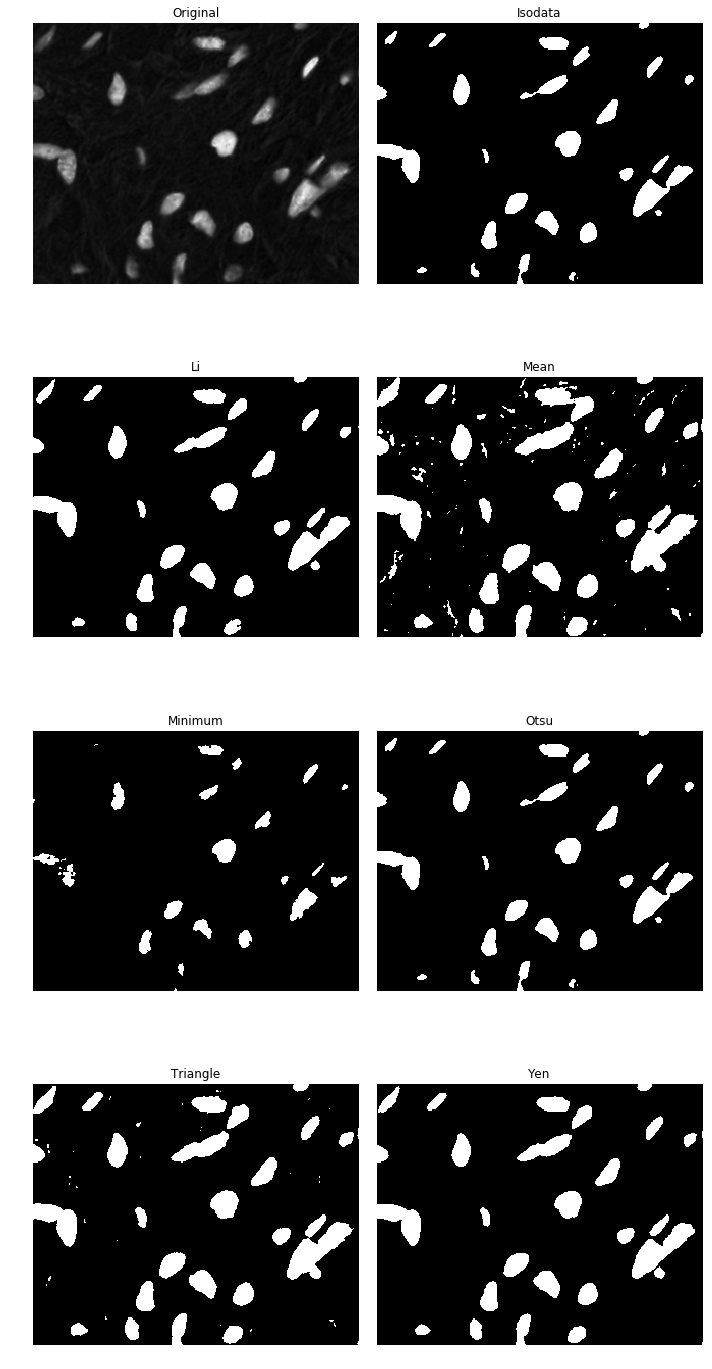

In [4]:
try_all_threshold(img, figsize=(10, 20), verbose=False);

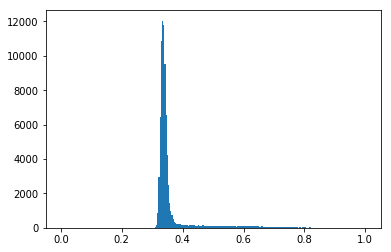

In [7]:
img_hist, cent_bins, patches = plt.hist(img.ravel(), bins=256, range=(0,1))

In [10]:
cent_bins.shape

(257,)

Задание №5. Адаптивный способ выбора порога бинаризации методом Оцу.

Метод Оцу сводится к минимизации внутриклассовой дисперсии, которая определяется как взвешенная сумма дисперсий двух классов:

$\sigma^{2}_{\omega} = \omega_1 \sigma^{2}_{1} + \omega_2 \sigma^{2}_{2}$, где $\omega_1$ и $\omega_2$ - вероятности первого и второго класса соответственно, $\sigma^{2}_{1}$ и $\sigma^{2}_{2}$ - дисперсии классов.
